<a href="https://colab.research.google.com/github/mkadamgithubrit/DL-Series/blob/main/manual_Algo_for_perceptron_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.datasets import make_classification
import numpy as np

In [61]:
x, y = make_classification(n_samples= 100, n_features=2, n_informative=1,n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           random_state= 41, hypercube=False, class_sep=10)

In [62]:
import matplotlib.pyplot as plt

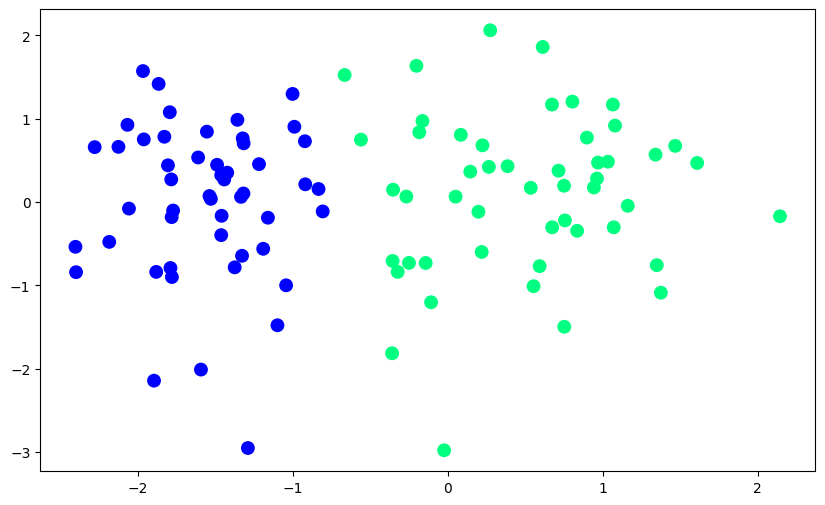

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="winter", s=80)


In [64]:
x.shape

(100, 2)

In [65]:
import numpy as np

def step(z):
    return 1 if z > 0 else 0

def perceptron(x, y):
    x = np.insert(x, 0, 1, axis=1)  # Add bias term
    weight = np.ones(x.shape[1])  # Initialize weights
    lr = 0.1  # Learning rate

    for i in range(10000):  # Number of iterations
        j = np.random.randint(0, x.shape[0])  # Pick a random sample
        y_hat = step(np.dot(x[j], weight))  # Prediction
        weight = weight + lr * (y[j] - y_hat) * x[j]  # Update weights

    return weight[0], weight[1:]  # Return bias (intercept) and coefficients



In [66]:
intercept_, coef = perceptron(x, y)

In [67]:
print(intercept_)
print(coef)

1.0
[1.33125964 0.06452193]


In [68]:
m = coef[0]/ coef[1]
c = intercept_/coef[1]

In [69]:
x_input = np.linspace(-3,3, 100)
y_input = m*x_input + c

(-3.0, 2.0)

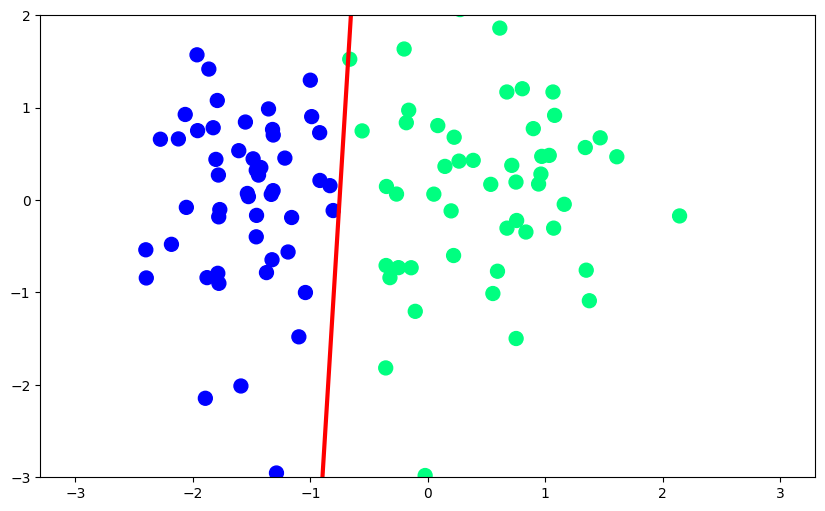

In [70]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color ="red", linewidth= 3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3,2)

##**using the built-in percepton Class inside the sklearn**

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data for binary classification
x, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.97


In [87]:
from mlxtend.plotting import plot_decision_regions

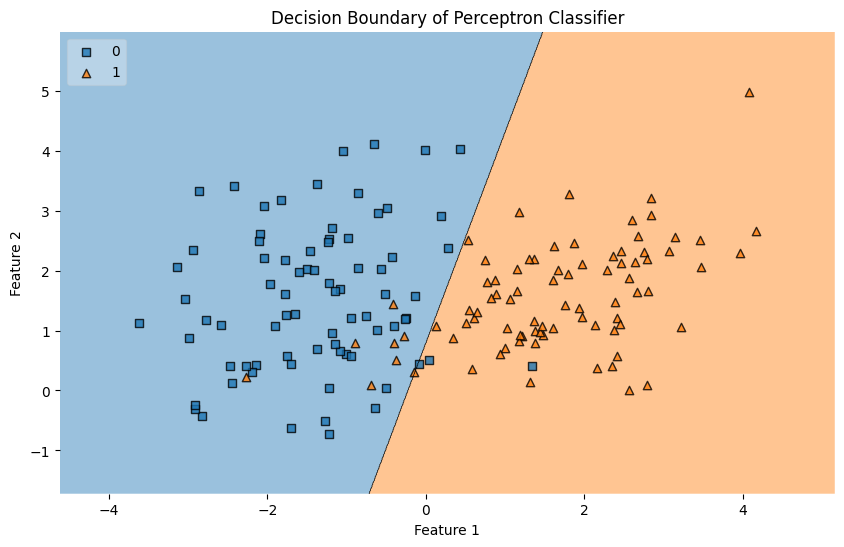

In [88]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(x_train, y_train, clf=model, legend=2)

# Add labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Perceptron Classifier")
plt.show()